# 6.2 - Correlations Matrix and other EDA visualizations

## Contents
1. Importing Visualizations Libraries and Data
    - seaborn, matplotlib
    -  cleaned Entire Home listings from 6.1
2. Column Selection for Data Visualization
3. Correlation Matrix Heatmap
    - matplotlib
    - matplotlib + seaborn annotations
4. Scatterplot
5. Pair Plot of entire data set
6. Categorical Plot
7. Questions and Observations, Hypothesis so far

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
#Setting path to Achievement 6 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER'

In [4]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [5]:
# Importing 6.1 data - Entire home listings from Dec 23rd ATX webscrape
listings = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_entirespace.csv'), index_col = False)

In [6]:
listings.shape

(8764, 56)

In [7]:
listings.head()

Unnamed: 0     id                         listing_url  host_id  host_since  \
0           0   5456   https://www.airbnb.com/rooms/5456     8028  2009-02-16   
1           3   6448   https://www.airbnb.com/rooms/6448    14156  2009-04-20   
2           4   8502   https://www.airbnb.com/rooms/8502    25298  2009-07-11   
3           5  13035  https://www.airbnb.com/rooms/13035    50793  2009-11-02   
4           6  18258  https://www.airbnb.com/rooms/18258    39458  2009-09-18   

  host_response_rate host_acceptance_rate  host_is_superhost  \
0               100%                  97%               True   
1               100%                 100%               True   
2               100%                  50%               True   
3               100%                  93%               True   
4               100%                  96%               True   

  host_neighbourhood  host_listings_count  host_verifications  \
0      East Downtown                  1.0  ['email', 'phone']   
1             Zilker                  1.0  ['email', 'phone']   
2     East Riverside                  1.0  ['email', 'phone']   
3      East Downtown                  2.0  ['email', 'phone']   
4                NaN                  1.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified  neighbourhood_cleansed  \
0                    t                      t                   78702   
1                    t                      t                   78704   
2                    t                      f                   78741   
3                    t                      t                   78702   
4                    t                      t                   78745   

   latitude  longitude       property_type        room_type  accommodates  \
0  30.26057  -97.73441   Entire guesthouse  Entire home/apt             3   
1  30.26034  -97.76487   Entire guesthouse  Entire home/apt             2   
2  30.23466  -97.73682  Entire guest suite  Entire home/apt             2   
3  30.26098  -97.73072         Entire home  Entire home/apt             3   
4  30.19756  -97.78754     Entire bungalow  Entire home/apt             2   

  bathrooms_text  bedrooms  beds amenities    price  minimum_nights  \
0         1 bath       NaN   2.0        []  $101.00               2   
1         1 bath       NaN   2.0        []  $159.00               3   
2         1 bath       NaN   1.0        []   $48.00               4   
3        2 baths       NaN   2.0        []  $123.00              30   
4        2 baths       NaN   2.0        []  $100.00               3   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0              90                       2                       2   
1             365                       3                       3   
2              90                       4                      20   
3             180                      30                      30   
4              30                       3                       3   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                      90                      90                     2.0   
1                    1125                    1125                     3.0   
2                      90                      90                     7.2   
3                     180                     180                    30.0   
4                    1125                    1125                     3.0   

  has_availability  availability_30  availability_60  availability_90  \
0                t               21               51               74   
1                t               10               10               16   
2                t               15               45               75   
3                t                0                0                0   
4                t                0                0                0   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               330          

In [8]:
listings.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'host_id', 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communica

### 2. Trimming Dataset for Matrix Heatmap

Currently at 56, would like to cap at 25 if possible.

Keepers include: 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude',
        'accommodates', 'beds','Bathroom_Numeric', 'price', 'minimum_nights', 'maximum_nights', 'has_availability',   'number_of_reviews',    'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month'
       
       That's 31... Maybe cut the booleans? host has profile pic, etc.

In [9]:
vars_list = ['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
             'host_listings_count', 'host_has_profile_pic', 
             'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 
             'accommodates', 'beds','Bathroom_Numeric', 'price', 'minimum_nights', 'maximum_nights', 
             'has_availability', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
             'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

In [10]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_entirespace.csv'), usecols = vars_list)

In [11]:
df.shape

(8764, 29)

In [12]:
#df['price'] = (df['price'].str.strip(['$']).astype(float))
# method above makes every price NaN for some reason

df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

Update: moving this up the notebook -> removing outliers in price.

(Learned this technique on Stack Overflow)

In [13]:
q = df['price'].quantile(0.99)

In [14]:
df = df[df['price']<q]

Technique complete, will rerun notebook and see how it affects visualizations.

In [15]:
df['host_since'] = df['host_since'].astype('datetime64[ns]')


In [16]:
df['first_review'] = df['first_review'].astype('datetime64[ns]')


In [17]:
df['last_review'] = df['last_review'].astype('datetime64[ns]')

In [18]:
df['host_response_rate'] = (df['host_response_rate'].str.strip('%').astype(float))


In [19]:
df['host_acceptance_rate'] = (df['host_acceptance_rate'].str.strip('%').astype(float))


In [20]:
df['last_review'] = df['last_review'].astype('datetime64[ns]')

In [21]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype('bool')

In [22]:
df['host_identity_verified'] = df['host_identity_verified'].astype('bool')

In [23]:
df['instant_bookable'] = df['instant_bookable'].astype('bool')

In [24]:
df['has_availability'] = df['has_availability'].astype('bool')

In [25]:
# appears a number of our datatype changes didn't stick, will redo them in this notebook.

df.dtypes

# Must change every object to another datatype

host_since                     datetime64[ns]
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                        bool
host_listings_count                   float64
host_has_profile_pic                     bool
host_identity_verified                   bool
neighbourhood_cleansed                  int64
latitude                              float64
longitude                             float64
accommodates                            int64
beds                                  float64
price                                 float64
minimum_nights                          int64
maximum_nights                          int64
has_availability                         bool
number_of_reviews                       int64
first_review                   datetime64[ns]
last_review                    datetime64[ns]
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_cleanliness         

### 3. Correlation Matrix Heatmaps

In [26]:
df.corr()

# Removing bools, they don't add anything here

host_since  host_response_rate  \
host_since                     1.000000           -0.013985   
host_response_rate            -0.013985            1.000000   
host_acceptance_rate           0.089147            0.388156   
host_is_superhost                   NaN                 NaN   
host_listings_count            0.077746           -0.009983   
host_has_profile_pic                NaN                 NaN   
host_identity_verified              NaN                 NaN   
neighbourhood_cleansed         0.048823            0.013893   
latitude                       0.059390            0.011458   
longitude                     -0.012513           -0.008049   
accommodates                   0.047853            0.031927   
beds                           0.024671            0.037439   
price                         -0.052048           -0.031913   
minimum_nights                -0.034538           -0.053069   
maximum_nights                -0.004125            0.012505   
has_availability                    NaN                 NaN   
number_of_reviews             -0.139335            0.062624   
first_review                   0.288008           -0.002240   
last_review                    0.076843            0.201302   
review_scores_rating          -0.037572            0.053683   
review_scores_accuracy        -0.035251            0.046680   
review_scores_cleanliness     -0.039290            0.074751   
review_scores_checkin         -0.056354            0.023470   
review_scores_communication   -0.043932            0.047688   
review_scores_location        -0.039762           -0.009900   
review_scores_value           -0.025481            0.040379   
instant_bookable                    NaN                 NaN   
reviews_per_month              0.060895            0.117781   
Bathroom_Numeric               0.006281            0.016070   

                             host_acceptance_rate  host_is_superhost  \
host_since                               0.089147                NaN   
host_response_rate                       0.388156                NaN   
host_acceptance_rate                     1.000000                NaN   
host_is_superhost                             NaN                NaN   
host_listings_count                     -0.025458                NaN   
host_has_profile_pic                          NaN                NaN   
host_identity_verified                        NaN                NaN   
neighbourhood_cleansed                   0.028984                NaN   
latitude                                 0.013681                NaN   
longitude                                0.016060                NaN   
accommodates                             0.061882                NaN   
beds                                     0.056426                NaN   
price                                   -0.115898                NaN   
minimum_nights                          -0.096817                NaN   
maximum_nights                           0.057786                NaN   
has_availability                              NaN                NaN   
number_of_reviews                        0.149614                NaN   
first_review                             0.053082                NaN   
last_review                              0.340290                NaN   
review_scores_rating                     0.007427                NaN   
review_scores_accuracy                   0.006731                NaN   
review_scores_cleanliness                0.027533                NaN   
review_scores_checkin                    0.005322                NaN   
review_scores_communication              0.011266                NaN   
review_scores_location                  -0.045587                NaN   
review_scores_value                      0.009428                NaN   
instant_bookable                              NaN                NaN   
reviews_per_month                        0.277289                NaN   
Bathroom_Numeric                         0.000779 

In [27]:
# df_nobs is this cleaner listings_entirespaces df without bools
# Will probably export this df to include bools
# but they don't contribute anything to the correlation heatmaps.

df_nobs = df.drop(columns = ['host_is_superhost', 'host_has_profile_pic', 
                             'host_identity_verified', 'has_availability', 
                             'instant_bookable'])

In [28]:
df_nobs.corr()

host_since  host_response_rate  \
host_since                     1.000000           -0.013985   
host_response_rate            -0.013985            1.000000   
host_acceptance_rate           0.089147            0.388156   
host_listings_count            0.077746           -0.009983   
neighbourhood_cleansed         0.048823            0.013893   
latitude                       0.059390            0.011458   
longitude                     -0.012513           -0.008049   
accommodates                   0.047853            0.031927   
beds                           0.024671            0.037439   
price                         -0.052048           -0.031913   
minimum_nights                -0.034538           -0.053069   
maximum_nights                -0.004125            0.012505   
number_of_reviews             -0.139335            0.062624   
first_review                   0.288008           -0.002240   
last_review                    0.076843            0.201302   
review_scores_rating          -0.037572            0.053683   
review_scores_accuracy        -0.035251            0.046680   
review_scores_cleanliness     -0.039290            0.074751   
review_scores_checkin         -0.056354            0.023470   
review_scores_communication   -0.043932            0.047688   
review_scores_location        -0.039762           -0.009900   
review_scores_value           -0.025481            0.040379   
reviews_per_month              0.060895            0.117781   
Bathroom_Numeric               0.006281            0.016070   

                             host_acceptance_rate  host_listings_count  \
host_since                               0.089147             0.077746   
host_response_rate                       0.388156            -0.009983   
host_acceptance_rate                     1.000000            -0.025458   
host_listings_count                     -0.025458             1.000000   
neighbourhood_cleansed                   0.028984            -0.058073   
latitude                                 0.013681             0.014383   
longitude                                0.016060             0.007721   
accommodates                             0.061882            -0.046323   
beds                                     0.056426            -0.038646   
price                                   -0.115898            -0.030677   
minimum_nights                          -0.096817             0.053632   
maximum_nights                           0.057786             0.079850   
number_of_reviews                        0.149614            -0.072717   
first_review                             0.053082             0.089821   
last_review                              0.340290            -0.020421   
review_scores_rating                     0.007427            -0.125992   
review_scores_accuracy                   0.006731            -0.113517   
review_scores_cleanliness                0.027533            -0.053324   
review_scores_checkin                    0.005322            -0.151534   
review_scores_communication              0.011266            -0.168060   
review_scores_location                  -0.045587            -0.048016   
review_scores_value                      0.009428            -0.133990   
reviews_per_month                        0.277289            -0.098134   
Bathroom_Numeric                         0.000779            -0.035096   

                             neighbourhood_cleansed  latitude  longitude  \
host_since                                 0.048823  0.059390  -0.012513   
host_response_rate                         0.013893  0.011458  -0.008049   
host_acceptance_rate                       0.028984  0.013681   0.016060   
host_listings_count                       -0.058073  0.014383   0.007721   
neighbourhood_cleansed                     1.000000  0.239721  -0.117167   
latitude                                   0.239721  1.000000   0.013275   
longitude                                 -0.117167  0.013275   1.0000

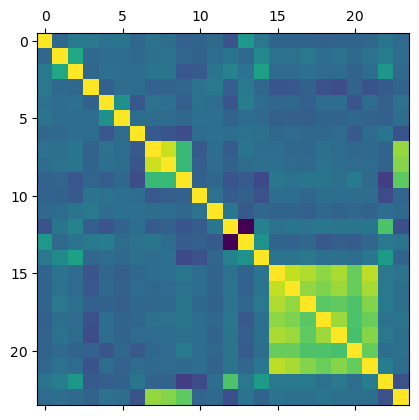

In [29]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_nobs.corr())
plt.show()

# Might need to trim further

In [30]:
cwd = os.getcwd()
cwd

# will move images to 04 Analysis -> Visualizations

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 6 - Self Designed Project/Austin Airbnb Project - MASTER FOLDER/03 Scripts'

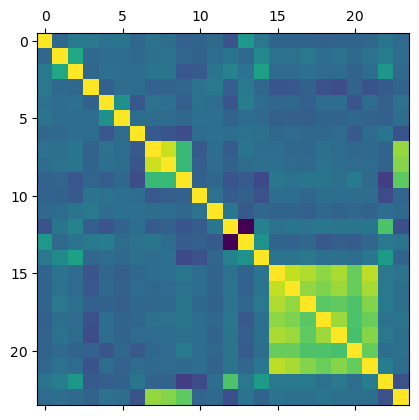

In [31]:
# Save Figure
plt.matshow(df_nobs.corr())
plt.savefig("aabnb_heatmap.png")

Text(0.5, 1.0, 'Correlation Matrix')

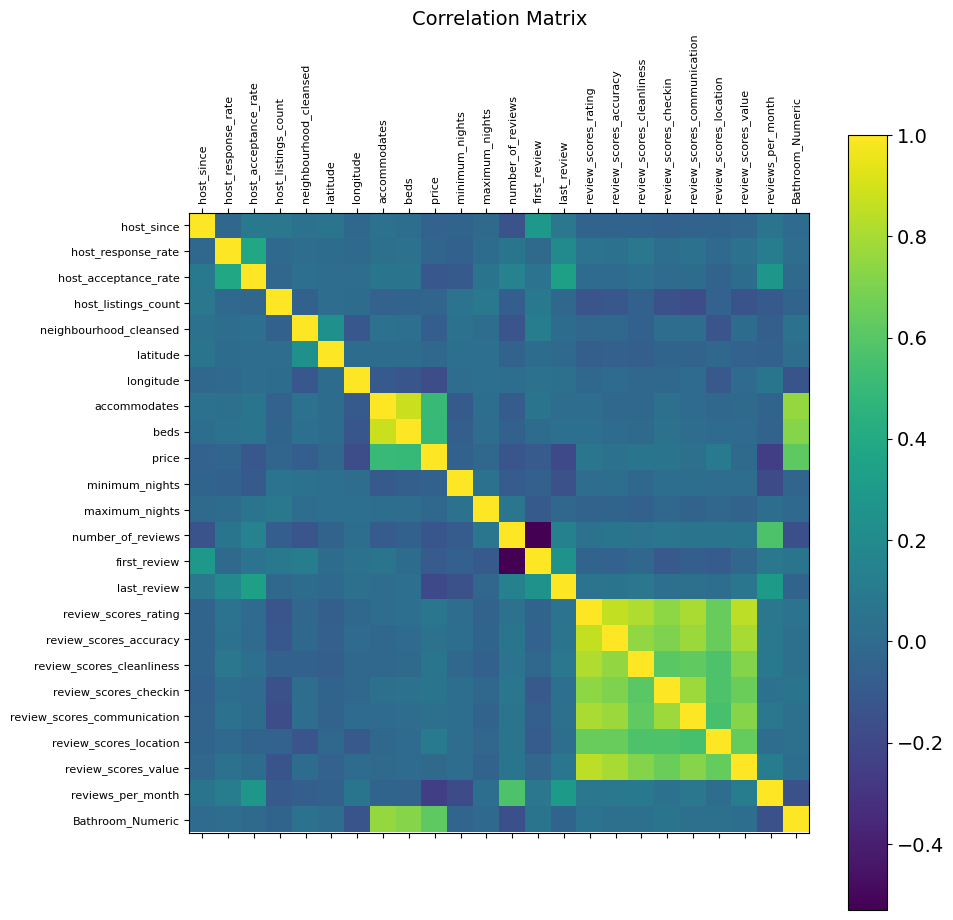

In [32]:
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_nobs.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_nobs.shape[1]), df_nobs.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(df_nobs.shape[1]), df_nobs.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Analyzing the correlation heatmap

### We see a lot of blue/green, which we might expect from a dataset with such disparate variables - this indicates a weak to no relationship between variables. Not a lot of strong negative relationships either - we see the negative side of the key bar maxes out at about -0.5. 

#### Besides the diagonal of 1's that correspond to a variable lining up with itself, we see a couple of positive correlation zones:
    - 'beds' and 'accomodates', which makes sense. If 'bedroom's came across cleanly in this scrape its a safe bet they would correlate as well.
    - Similarly strong correlation with 'accomodates' is 'Bathroom_Numeric', larger places that can accomodate more would logically have more bathrooms.
    - The 7x7 square of 'review_scores' and its subcategories; a high score in one would generally be correlated with other high scores. This might be a stretch but it appears that review_scores_location has a slightly weaker correlation to the review_scores_rating than the other review_scores subcategories. So a good location might not be as correlated to a good score than, say a good value would be.
    -Number of reviews and reviews per month. Not a very strong correlation but stronger than the surrounding, enough to take notice. This makes sense intuitively.
    
#### In terms of negative correlations, bearing in mind that we don't see any highly negative correlations in this heatmap:
    - Price and host response rate; so the higher the price, the lower the response rate. I could buy that; more expensive properties, probably more vacancy/ less stays, balanced out by more money per stay.  Maybe these listing owners only rent it out occasionally, on certain event weekends where they can command higher prices.
    -First review and number of reviews; So the older(lower number) the first review, the higher the number of reviews in total. That's pretty intuitive as well.

In [33]:
# Seaborn heatmap with a subset of #df_nobs

sub = df_nobs[['host_response_rate', 'accommodates', 'beds', 
               'Bathroom_Numeric', 'price', 
               'number_of_reviews', 'first_review', 
               'last_review', 'review_scores_rating',
               'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication',
              'review_scores_location', 'review_scores_value', 'reviews_per_month']]

In [34]:
sub

host_response_rate  accommodates  beds  Bathroom_Numeric  price  \
0                  100.0             3   2.0               1.0  101.0   
1                  100.0             2   2.0               1.0  159.0   
2                  100.0             2   1.0               1.0   48.0   
3                  100.0             3   2.0               2.0  123.0   
4                  100.0             2   2.0               2.0  100.0   
...                  ...           ...   ...               ...    ...   
8759                93.0             4   1.0               1.0  125.0   
8760               100.0            16   8.0               3.0   79.0   
8761                 NaN             4   1.0               1.0   85.0   
8762               100.0             5   3.0               2.0  137.0   
8763               100.0             6   3.0               1.0   67.0   

      number_of_reviews first_review last_review  review_scores_rating  \
0                   668   2009-03-08  2023-11-20                  4.84   
1                   312   2011-09-06  2023-12-04                  4.97   
2                    51   2010-02-19  2023-05-16                  4.56   
3                    18   2011-03-16  2023-06-19                  5.00   
4                    20   2022-10-25  2023-11-22                  5.00   
...                 ...          ...         ...                   ...   
8759                  1   2023-12-14  2023-12-14                  5.00   
8760                  1   2023-12-14  2023-12-14                  5.00   
8761                  1   2023-12-16  2023-12-16                  4.00   
8762                  1   2023-12-10  2023-12-10                  5.00   
8763                  1   2023-12-15  2023-12-15                  5.00   

      review_scores_accuracy  review_scores_cleanliness  \
0                       4.88                       4.86   
1                       4.97                       4.96   
2                       4.52                       4.70   
3                       4.94                       4.94   
4                       5.00                       5.00   
...                      ...                        ...   
8759                    5.00                       5.00   
8760                    5.00                       5.00   
8761                    4.00                       3.00   
8762                    5.00                       5.00   
8763                    5.00                       5.00   

      review_scores_checkin  review_scores_communication  \
0                      4.89                         4.83   
1                      4.99                         4.97   
2                      4.84                         4.87   
3                      5.00                         5.00   
4                      5.00                         5.00   
...                     ...                          ...   
8759                   5.00                         5.00   
8760                   5.00                         5.00   
8761                   1.00                         3.00   
8762                   5.00                         5.00   
8763                   5.00                         5.00   

      review_scores_location  review_scores_value  reviews_per_month  
0                       4.73                 4.79               3.71  
1                       4.97                 4.89               2.09  
2                       4.67                 4.60               0.30  
3                       5.00                 4.94               0.12  
4                       4.60                 4.95               1.44  
...                      ...                  ...                ...  
8759                    5.00                 5.00               1.00  
8760                    5.00                 5.00               1.00  
8761                    5.00                 4.00               1.00  
8762                    5.00                 5.00               1.00  
8763                    5.00 

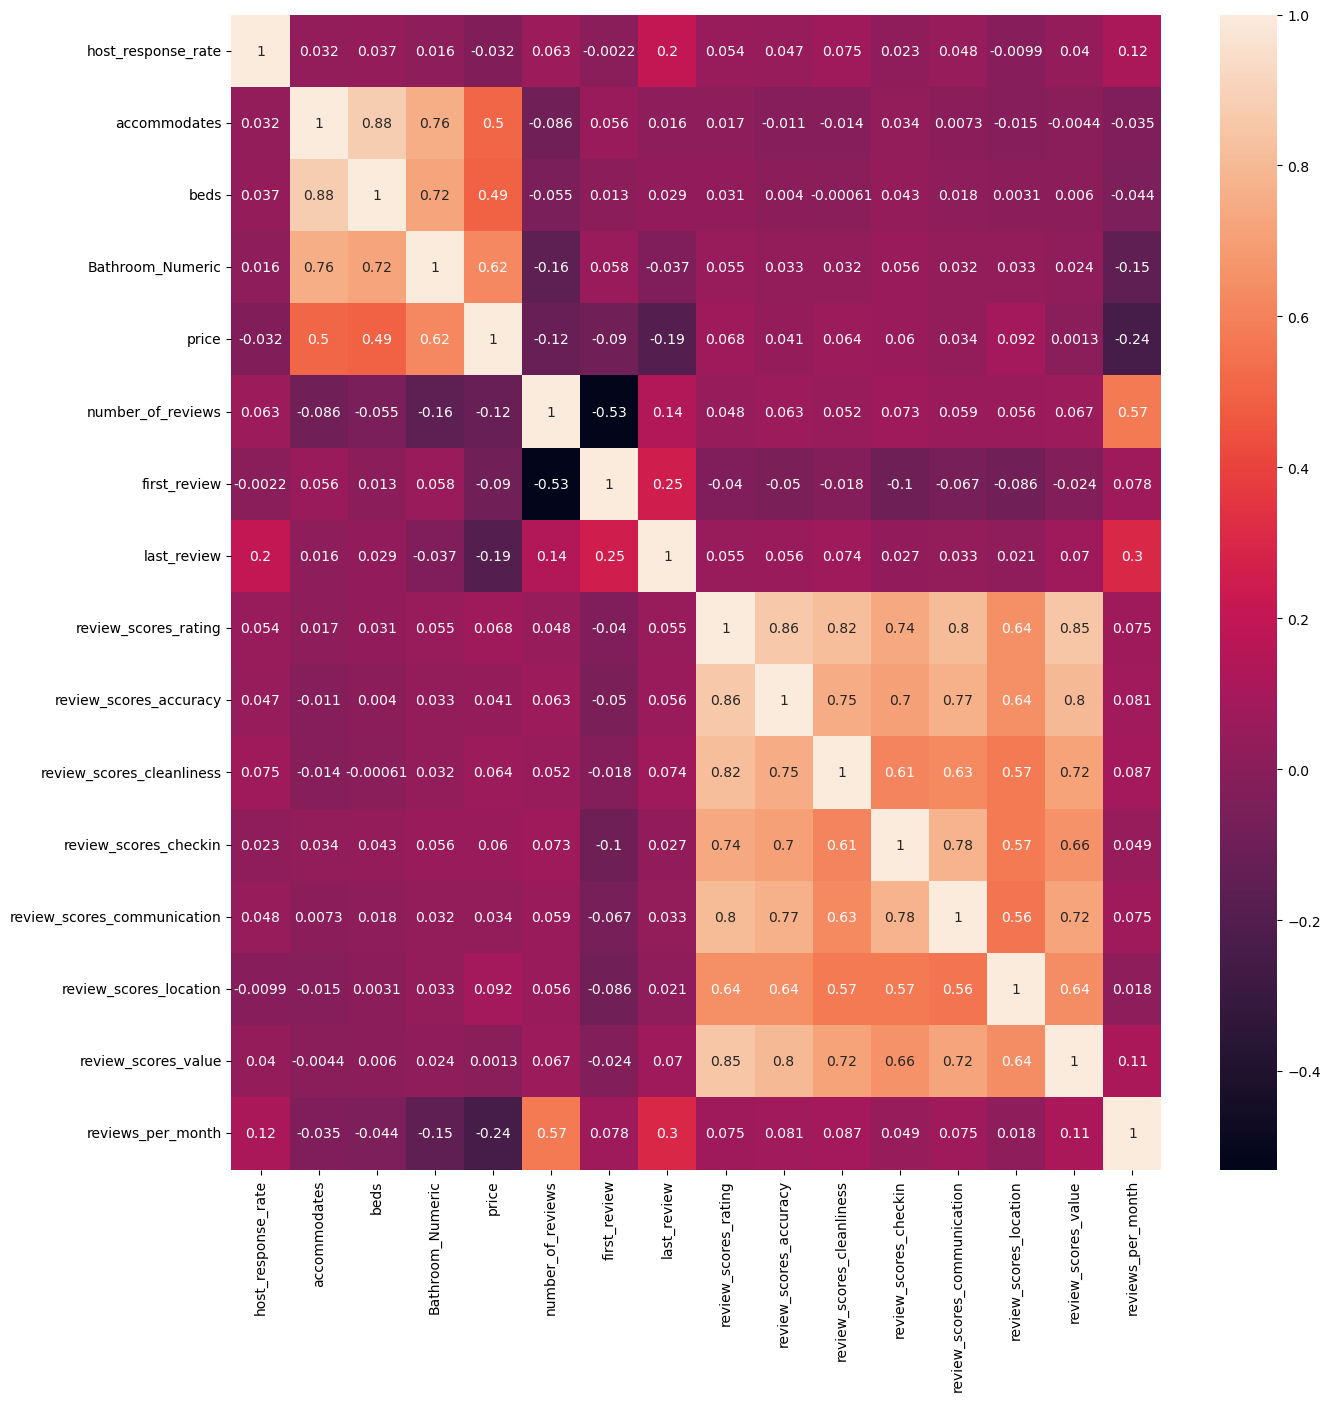

In [35]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn 
# by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)


# The`annot`argument allows the plot to 
# place the correlation coefficients onto the heatmap.

### 4. Scatterplots

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


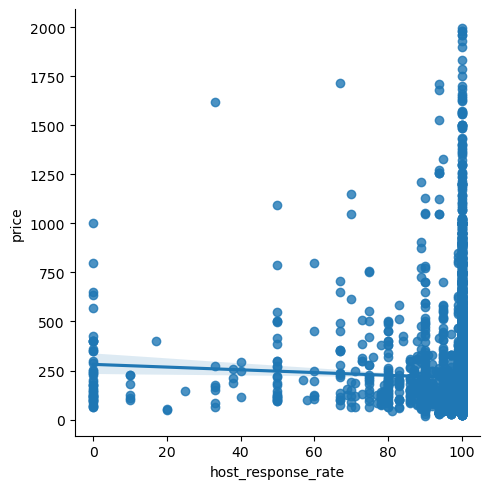

In [36]:
# Creating a scatterplot for the "price" and "host_response_rate" columns in seaborn

price_hostresponse = sns.lmplot(y = 'price', x = 'host_response_rate', data = df_nobs)

This was the most interesting of the negative correlations to me. Of course the majority of hosts respond 100% of the time, regardless of price. But it would be interesting to examine the results with outliers accounted for. I see a 10,000 dollar, 0 response rate listing that is skewing the data to show this negative correlation, but without it, is there still a pattern of lower responses for more expensive listings? Could be worth exploring.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


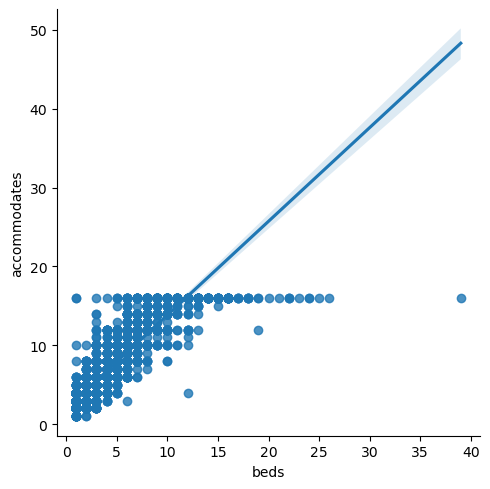

In [37]:
# Creating a scatterplot for the "beds" and "accomodates" columns in seaborn

sns.lmplot(x = 'beds', y = 'accommodates', data = df_nobs)

Again, a common-sense correlation: more beds can accomodate more people, and the scatterp.]lot reflects this. A few outliers make this graph more bunched up than ideal.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


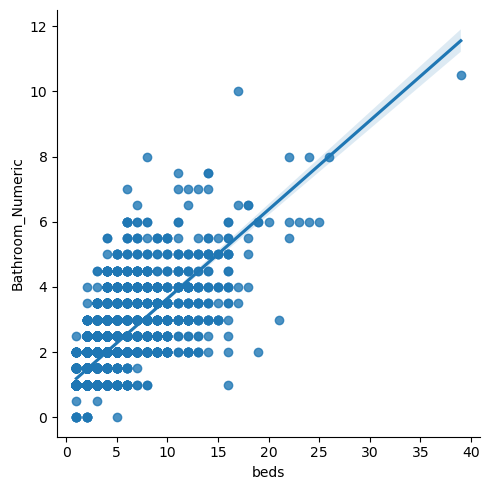

In [38]:
# Creating a scatterplot for the "beds" and "Bathroom_Numeric" columns in seaborn

bedbath = sns.lmplot(x = 'beds', y = 'Bathroom_Numeric', data = df_nobs)

Related but more legible, we see the positive correlation between beds and bathrooms. 

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


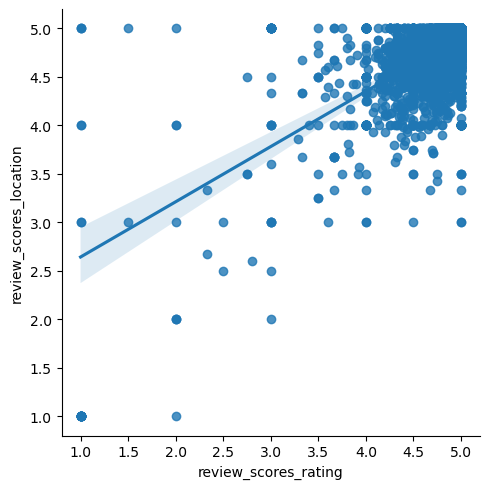

In [39]:
sns.lmplot(x = 'review_scores_rating', y = 'review_scores_location', data = df_nobs)

Just wanted to examine one of the subcategories with review_scores_ratings to see how they related. Numerically it wasn't as strong as the other categories. This one will be interesting to compare to the others in the pair plot.

Saving some of these scatterplots to Vizualisations folder in 04 Analysis.

In [40]:
bedbath.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bedbath_scatter.png'))

In [41]:
price_hostresponse.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hostresponse_scatter.png'))

### 5. Pair Plot

Going to try to create pair plot with entire sub list, will probably have to reduce it further for legibility.

Update: got this warning -> /Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

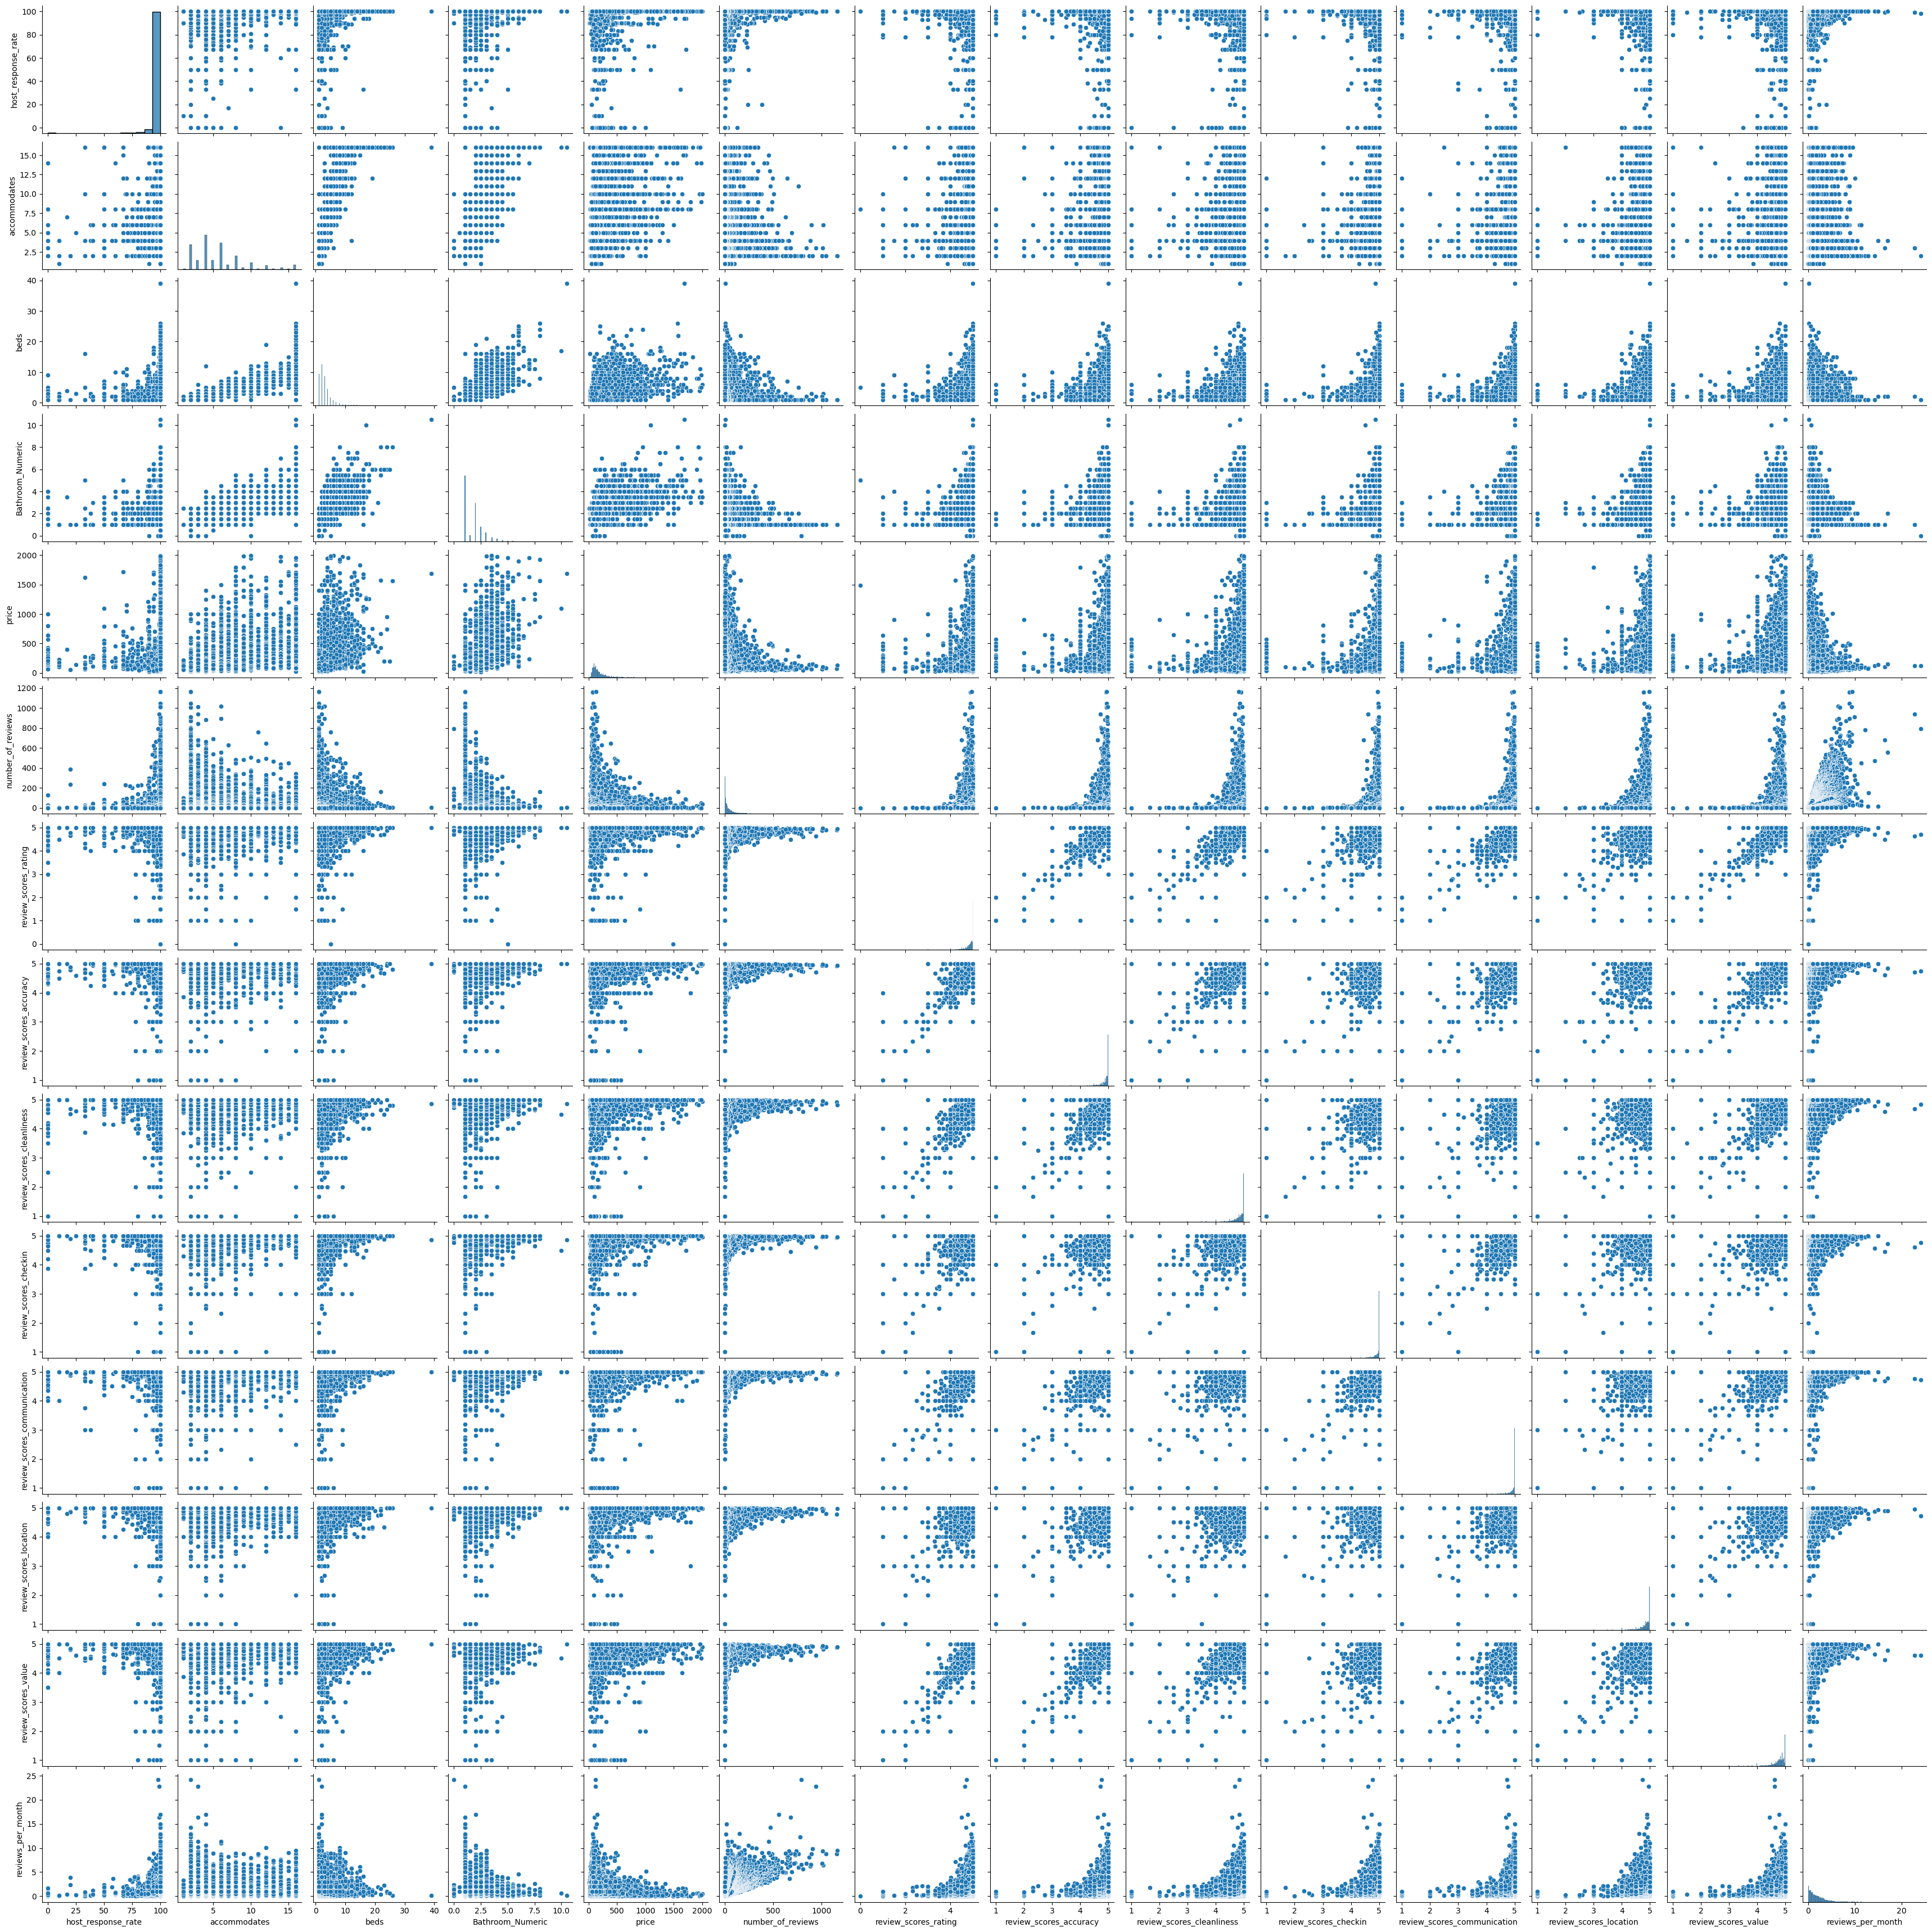

In [42]:
pairplot_sub = sns.pairplot(sub)

In [43]:
pairplot_sub.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplotsub_massive.png'))

In [44]:
# Will try another subsection just to get clearer results from pairplot

sub_2 = df_nobs[['accommodates', 'beds', 
               'Bathroom_Numeric', 'price', 
               'number_of_reviews','review_scores_rating',
                'reviews_per_month']]

In [45]:
sub_2

accommodates  beds  Bathroom_Numeric  price  number_of_reviews  \
0                3   2.0               1.0  101.0                668   
1                2   2.0               1.0  159.0                312   
2                2   1.0               1.0   48.0                 51   
3                3   2.0               2.0  123.0                 18   
4                2   2.0               2.0  100.0                 20   
...            ...   ...               ...    ...                ...   
8759             4   1.0               1.0  125.0                  1   
8760            16   8.0               3.0   79.0                  1   
8761             4   1.0               1.0   85.0                  1   
8762             5   3.0               2.0  137.0                  1   
8763             6   3.0               1.0   67.0                  1   

      review_scores_rating  reviews_per_month  
0                     4.84               3.71  
1                     4.97               2.09  
2                     4.56               0.30  
3                     5.00               0.12  
4                     5.00               1.44  
...                    ...                ...  
8759                  5.00               1.00  
8760                  5.00               1.00  
8761                  4.00               1.00  
8762                  5.00               1.00  
8763                  5.00               1.00  

[8674 rows x 7 columns]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


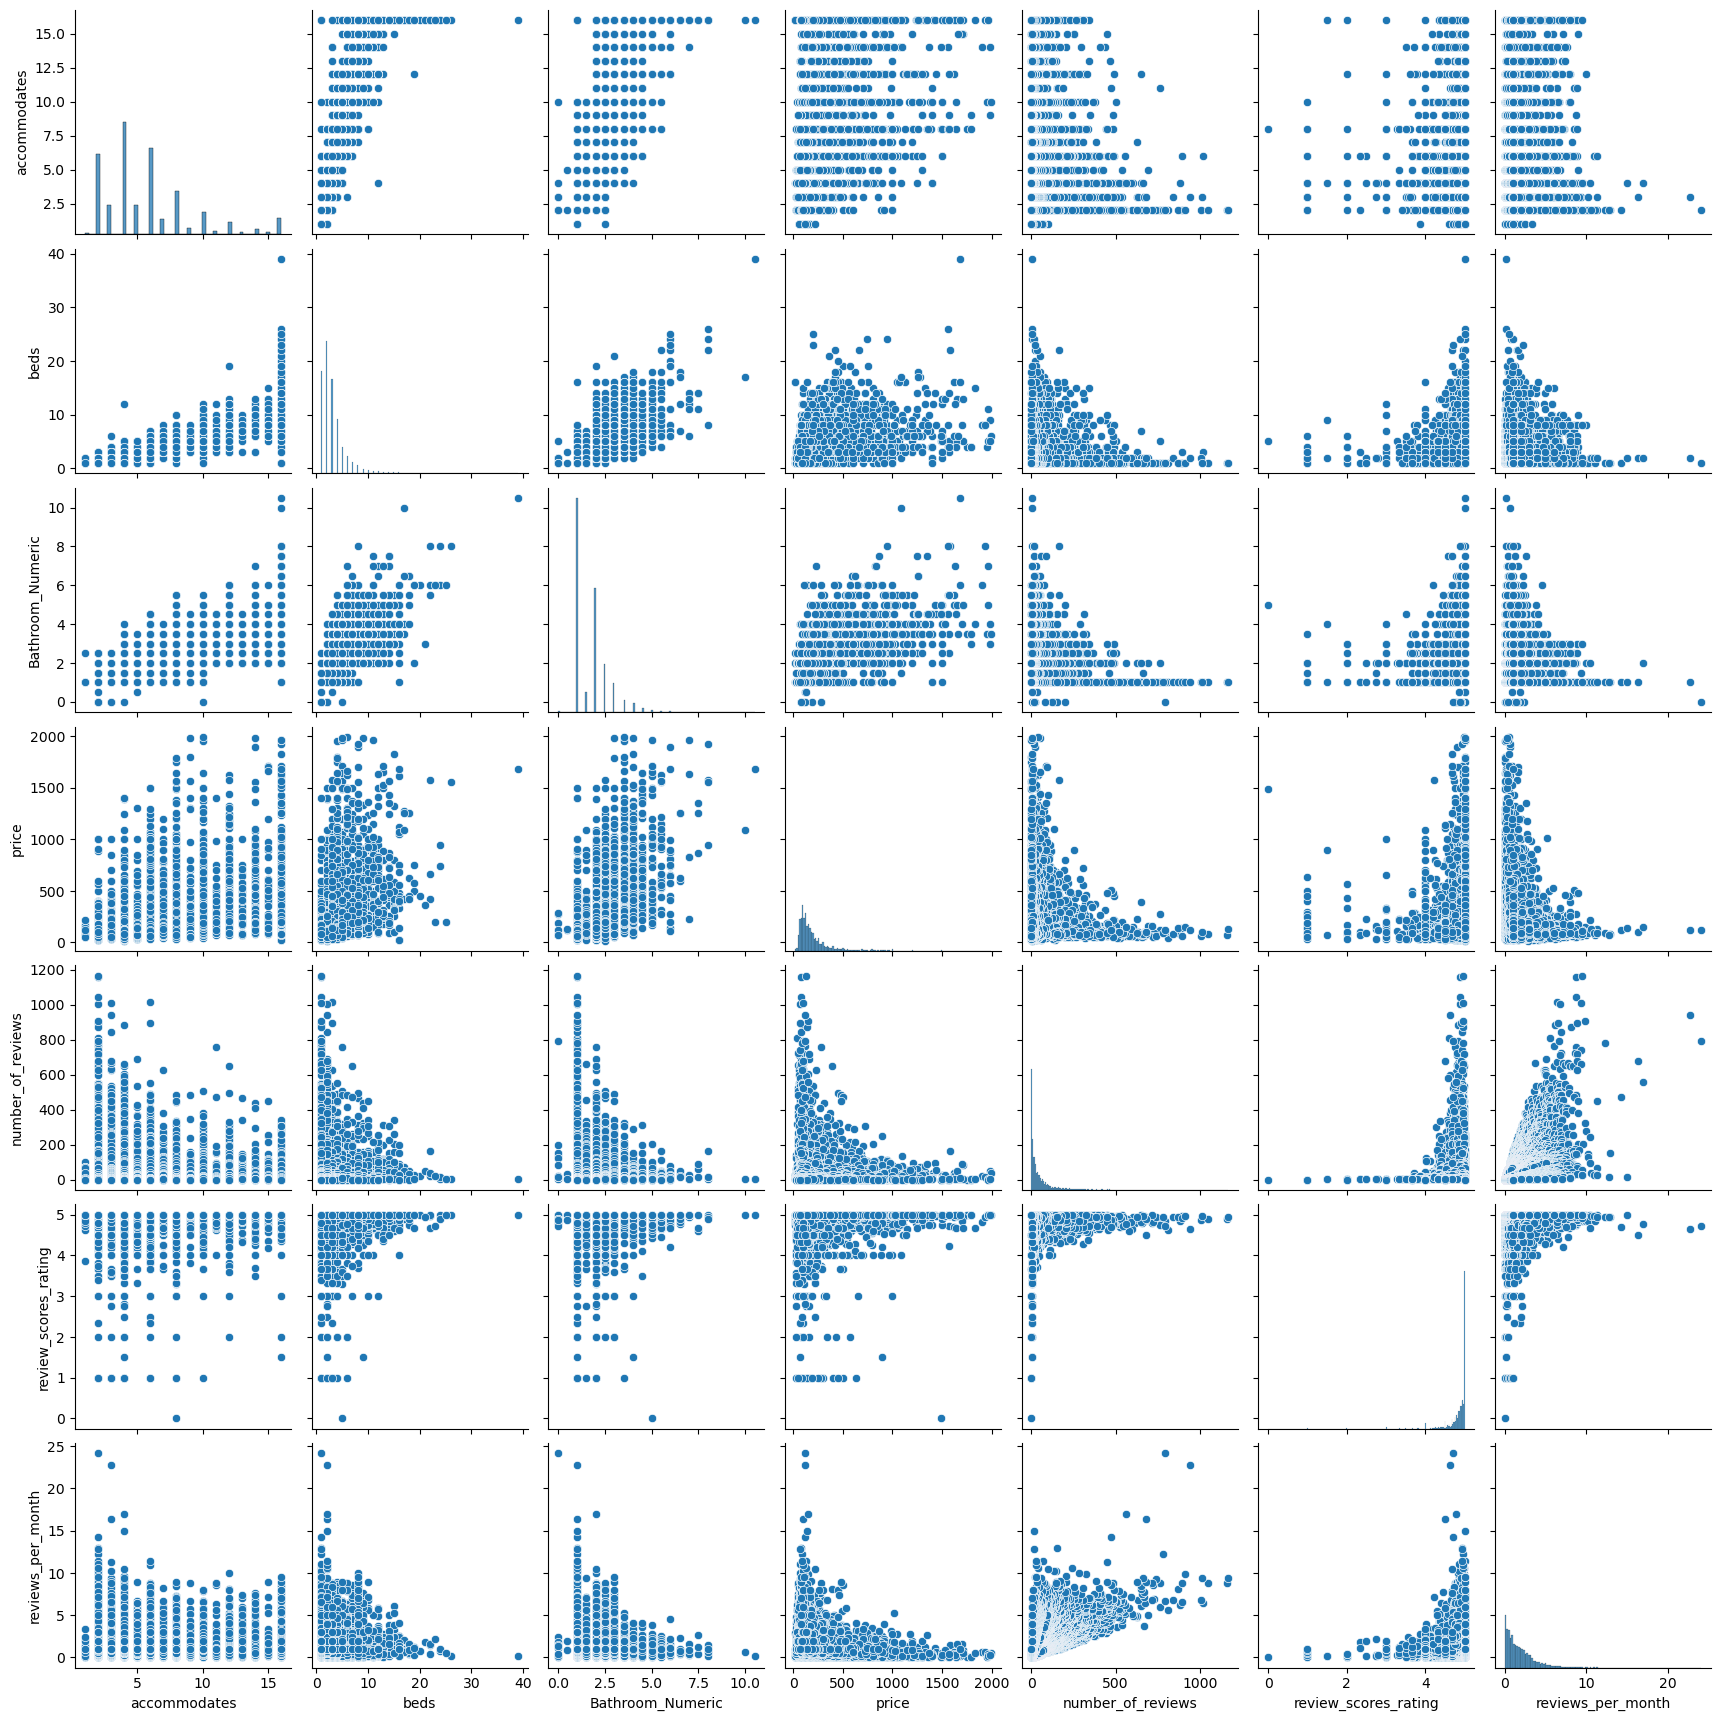

In [46]:
pairplot_sub2 = sns.pairplot(sub_2)

In [47]:
pairplot_sub2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplotsub2.png'))

The distribution of variables showed how many of the results are potentially skewed by outliers. Not many places are accomodating 40+ people and cost 10,000 a night, but they're included and do keep us from getting a more granular look at the Austin Airbnb market.

The variables that I'd like to explore further are price, one of our few continuous variables that aren't tied to something as arbitrary as reviews, and some combination of review count, whether that be number of reviews and reviews per month.

It seems that most units don't have many reviews, and the ones that do are usually not very pricey by night. But there are a handful that are above the low-price segment that also have a lot of reviews. They might be the considered the high-performers. What are they doing, are they professionally hosted? Well-located? Well photographed? I'd like to explore further.



### 6. Categorical Plot

Creating a categorical variable that splits the "Price per Unit" column into categories

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

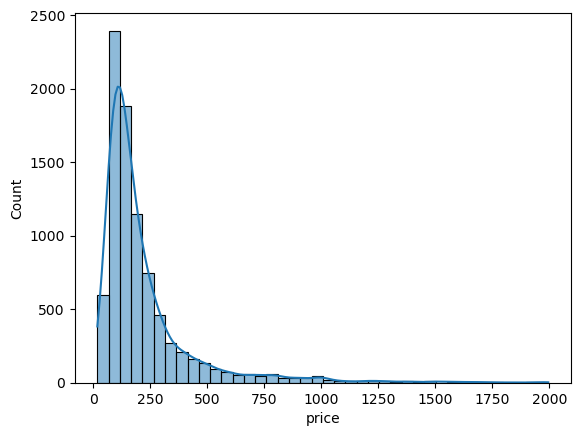

In [48]:
# The argument "kde" add a line that encompasses the distribution.

sns.histplot(df['price'], bins = 40, kde = True)

# Need to address this outlier. See further up the notebook, in section 2.


In [49]:
df.loc[df['price'] < 100, 'Price Category'] = 'Low price'

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_79224/2597053395.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low price' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['price'] < 100, 'Price Category'] = 'Low price'


In [50]:
df.loc[(df['price'] >= 100) & (df['price'] < 250), 'Price Category'] = 'Middle Price' 
       

In [51]:
df.loc[df['price'] >= 250, 'Price Category'] = 'High price'

In [52]:
df['Price Category'].value_counts(dropna = False)

Price Category
Middle Price    4337
Low price       2187
High price      2150
Name: count, dtype: int64

In [53]:
df.columns

Index(['host_since', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'Bathroom_Numeric', 'Price Category'],
      dtype='object')

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

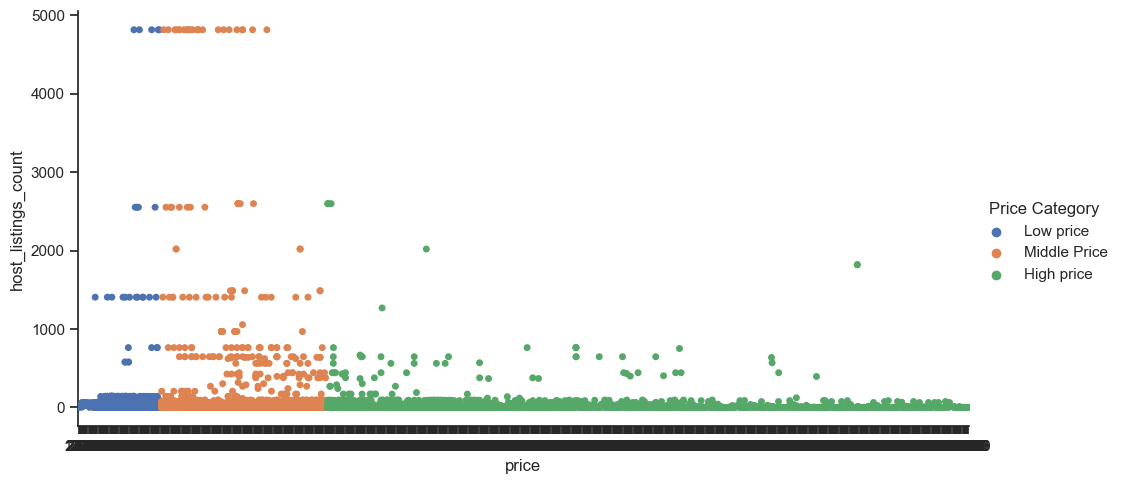

In [54]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
catplot_price_hostlistings = sns.catplot(y="host_listings_count", 
                                         x="price",
                                         hue="Price Category", 
                                         data=df,
                                        aspect = 2,
                                        kind = "strip")

In [55]:
catplot_price_hostlistings.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_price_hostlistings.png'))

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

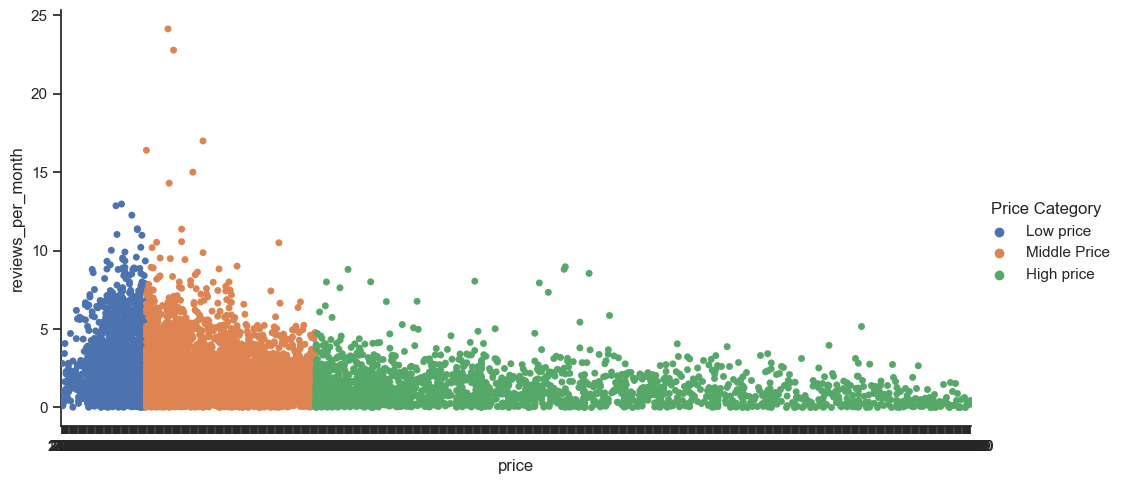

In [56]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
catplot_price_reviewspermonth = sns.catplot(y="reviews_per_month", 
                                            x="price", 
                                            hue="Price Category", 
                                            data=df,
                                           aspect = 2,
                                           kind = "strip")

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

([<matplotlib.axis.XTick at 0x300937fd0>,
 [Text(0.01, 0, '0.01'),
  Text(2.4219999999999997, 0, '0.03'),
  Text(4.834, 0, '0.06'),
  Text(7.2459999999999996, 0, '0.08'),
  Text(9.658, 0, '0.11'),
  Text(12.069999999999999, 0, '0.13'),
  Text(14.482, 0, '0.15'),
  Text(16.894000000000002, 0, '0.18'),
  Text(19.306, 0, '0.2'),
  Text(21.718, 0, '0.23'),
  Text(24.13, 0, '0.25')])

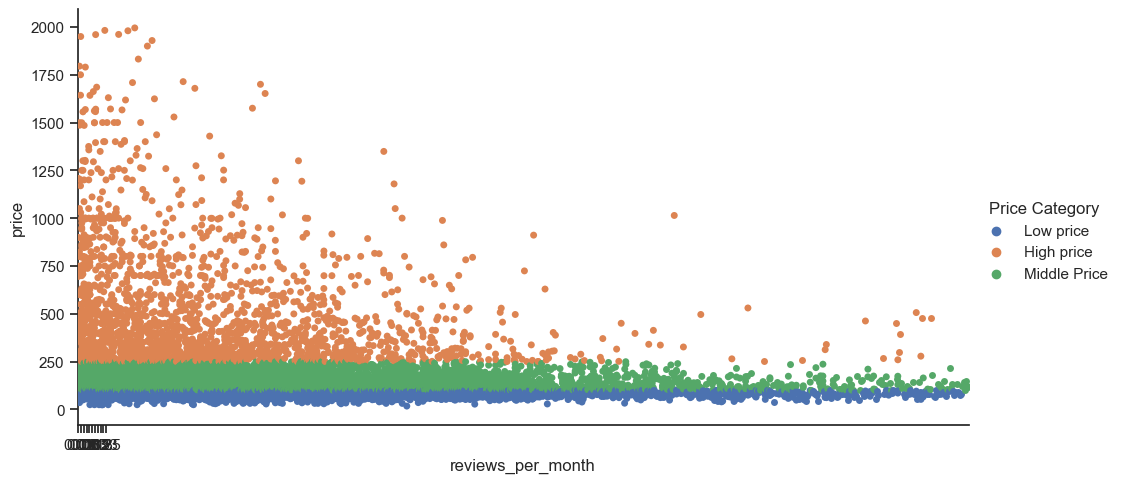

In [66]:

sns.set(style="ticks")
catplot_price_reviewspermonth_flip = sns.catplot(x="reviews_per_month", 
                                                 y="price", 
                                                 hue="Price Category", 
                                                 data=df,
                                                aspect = 2,
                                                kind = "strip")

min_value = df['reviews_per_month'].min()
max_value = df['reviews_per_month'].max()
range_values = max_value - min_value 

# Determine the number of ticks to show
num_ticks = 10

# Calculate tick interval
tick_interval = range_values / num_ticks

# Set the ticks at evenly spaced intervals
ticks = [min_value + i * tick_interval for i in range(num_ticks + 1)]
plt.xticks(ticks)


In [60]:
catplot_price_reviewspermonth.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_price_reviewspermonth.png'))

### Analysing Catplot

We see a handful of outliers in the middle price category, garnering over 15 reviews per month, which by  estimations from Inside Airbnb would mean it averages full capacity. Also notable, even in the more elevated price range of between 250 and 500, there were listings garnering around 10 reviews per month, which would be very lucrative for their owners.

Annoyed that each time the x axis doesn't show any notches, need to investigate.

## 7. Hypotheses

So a lot of the categories for questions to explore did not make it to these visualizations, because there wasn't a numerical component - some of these are derivable later on like age of listing (can derive based on oldest review), others I'm hoping to be able to explore in later exercises - especially the neighborhood/geographical ones, the booleans, and the professional vs amateur hosts.

My hypothesis is that the most highly booked and expensive (and therefore lucrative) listings will be ones that can accomodate a lot of people (accommodates/beds/bathrooms), and are nearby popular amenities like Ladybird Lake, Downtown, UT campus, etc.

Need to find out if there's a stat I can pull to quantify proximity to amenities, like how the example set about Taiwan has N. of shops in a given area.

This analysis was interesting in that it showed how many outliers there were in price and response rate - some of these listings are really a moonshot when others get a lot of business. Need to be cognizant of how to filter for each.

In [59]:
df.to_csv(os.path.join(path,'02 Data', 'Prepared Data','listings_clean.csv'))